# HPLC Peak Deconvolution

## Deconvolution code was taken from this GitHub: 
#### https://github.com/emilyripka/BlogRepo/blob/master/181119_PeakFitting.ipynb

### Here we will take a HPLC chromatogram from a csv file and plot the results. There are two peaks which require peak deconvolution using gaussian function and least squares method. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

### Load data from csv file into np.array.  delimeter is data seperated by ",", skiprows = 2 (skip first two rows because they contain strings, usecols = (0,1) using only columns 1 and 2. Check shape.

In [2]:
a = np.loadtxt("HPLC2.csv", delimiter = ",", skiprows=(2), usecols =(0,1))
a.shape

(38801, 2)

### Check array to see if data was correctly recorded.

In [3]:
print (a[:,0])
print (a[:,1])
type (a)

[-7.44500000e-02 -7.16700000e-02 -6.88900000e-02 ...  1.07790291e+02
  1.07793076e+02  1.07795853e+02]
[0. 0. 0. ... 0. 0. 0.]


numpy.ndarray

### Plot the data to see the chromatogram

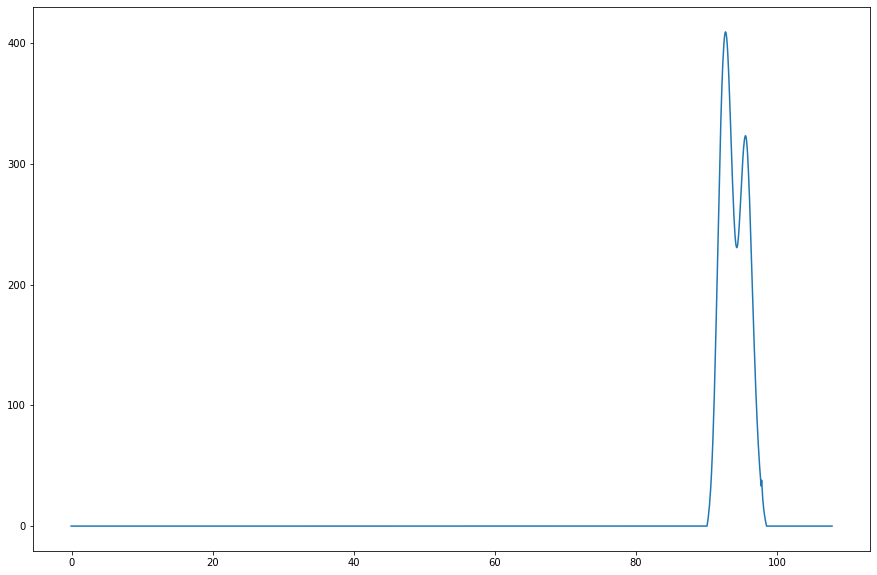

In [4]:
x = (a[:,0])
y = (a[:,1])

plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.show()

### Zoom into region with overlapping curves

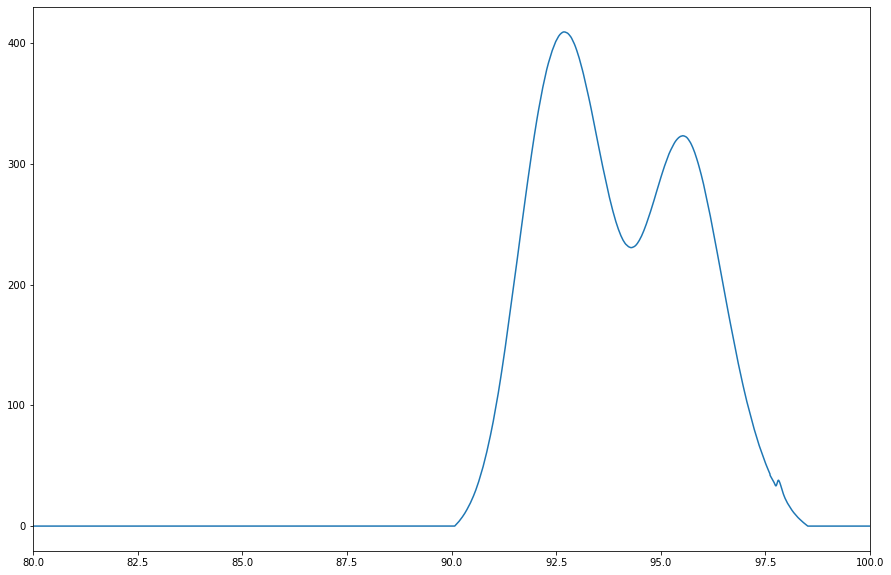

In [5]:
plt.figure(figsize=(15,10))
plt.plot(x,y)
plt.xlim([80,100])
plt.show()

### Function for deconvulting spectrum using two gaussian functions. Make initial guesses on parameters based on graph

In [6]:
#Inital guess of curve 1
amp1 = 100
sigma1 = 10
cen1 = 92.5

#Inital guess of curve 2
amp2 = 75
sigma2 = 5
cen2 = 96

def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

### Scipy curve optimize of 2 gaussian functions

In [7]:
popt_2gauss, pcov_2gauss = curve_fit(_2gaussian,x, y, p0=[amp1, cen1, sigma1, \
                                                                                          amp2, cen2, sigma2])
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))

### Plug in fitted parameters to single gaussian function

In [8]:
x_model = np.linspace(0,100,1000)
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(x_model, *pars_1)
gauss_peak_2 = _1gaussian(x_model, *pars_2)

### Plotting results

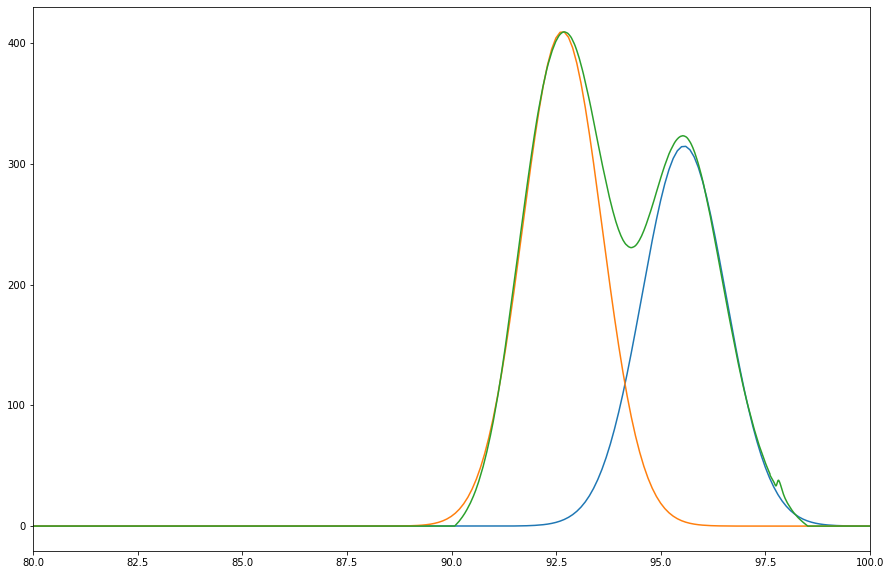

In [9]:
plt.figure(figsize=(15,10))
plt.plot(x_model, gauss_peak_1)
plt.plot(x_model, gauss_peak_2)
plt.plot(x,y)
plt.xlim([80,100])
plt.show()

### Print Results from Fits

In [10]:
print ("-------------Peak 1-------------")
print ("amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], perr_2gauss[0]))
print ("center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_2gauss[1]))
print ("sigma = %0.2f (+/-) %0.2f" % (pars_1[2], perr_2gauss[2]))
print ("area = %0.2f" % np.trapz(gauss_peak_1))
print ("--------------------------------")
print ("-------------Peak 2-------------")
print ("amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], perr_2gauss[3]))
print ("center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_2gauss[4]))
print ("sigma = %0.2f (+/-) %0.2f" % (pars_2[2], perr_2gauss[5]))
print ("area = %0.2f" % np.trapz(gauss_peak_2))
print ("--------------------------------")

-------------Peak 1-------------
amplitude = 793.34 (+/-) 0.28
center = 95.55 (+/-) 0.00
sigma = 1.01 (+/-) 0.00
area = 7925.45
--------------------------------
-------------Peak 2-------------
amplitude = 972.67 (+/-) 0.28
center = 92.65 (+/-) 0.00
sigma = 0.95 (+/-) 0.00
area = 9716.95
--------------------------------
